<a href="https://colab.research.google.com/github/kartiknd/TSF-Tasks/blob/main/TSF_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Kartik Deshmukh**

**TSF Internship Data Science and Business Analytics**

**Task 2:** Predicting the optimum number of clusters and representing it visually using Unsupervised ML



**Importing the necessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading the dataset**

In [4]:
from sklearn.datasets import load_iris
dataset=load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
#converting dataset into rows and columns form
iris=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
#Printing the first five rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#counting total number of rows and columns
iris.shape

(150, 4)

In [ ]:
#checking for null values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
#seperating the input and output
x=dataset.data
y=dataset.target

**Data Visualization**

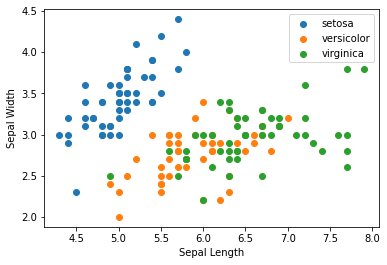

In [9]:
#plotting a graph between sepal length and width
plt.scatter(x[y==0,0],x[y==0,1], label='setosa')
plt.scatter(x[y==1,0],x[y==1,1], label='versicolor')
plt.scatter(x[y==2,0],x[y==2,1], label='virginica')
plt.legend(loc='upper right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

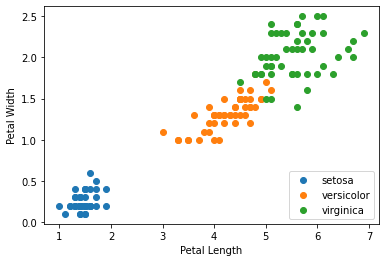

In [10]:
#plotting a graph between petal length and width
plt.scatter(x[y==0,2],x[y==0,3], label='setosa')
plt.scatter(x[y==1,2],x[y==1,3], label='versicolor')
plt.scatter(x[y==2,2],x[y==2,3], label='virginica')
plt.legend(loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

From the above plots we can come toa conclusion that petal length and its width are better predictors as setosa is easily seperable from the remaining two

**Applying Algorithm**

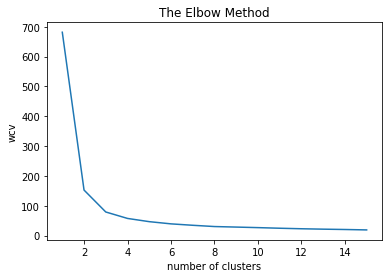

In [11]:
#using the K-Means Clustering
from sklearn.cluster import KMeans
#checking the optimum values of 'k' in the cluster variation 
wcv=[]
for i in range(1,16):
  kM=KMeans(n_clusters=i)
  kM.fit(x)
  wcv.append(kM.inertia_)

#plotting a graph for getting the elbow point
plt.plot(range(1,16),wcv)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcv')
plt.show()


We can now note the elbow point i.e 3

In [12]:
#creating the kmeans classifier
kM=KMeans(n_clusters=3)
y_pred=kM.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [13]:
iris['clusters']=y_pred
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Visualizing the clusters of Sepal Length and its Width for centroids**

---



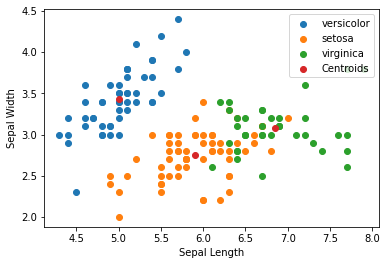

In [20]:
#plotting the centroids
plt.scatter(x[y_pred==0,0],x[y_pred==0,1], label='versicolor')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], label='setosa')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], label='virginica')
plt.scatter(kM.cluster_centers_[:,0],kM.cluster_centers_[:,1], label="Centroids")
plt.legend(loc='upper right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

**Similarly visualizing the petal length and petal width for centroids**

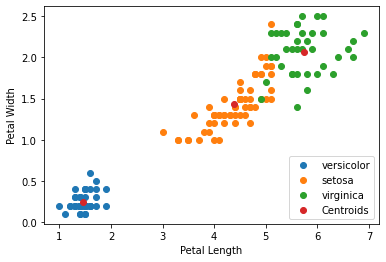

In [21]:
#plotting the centroids
plt.scatter(x[y_pred==0,2],x[y_pred==0,3], label='versicolor')
plt.scatter(x[y_pred==1,2],x[y_pred==1,3], label='setosa')
plt.scatter(x[y_pred==2,2],x[y_pred==2,3], label='virginica')
plt.scatter(kM.cluster_centers_[:,2],kM.cluster_centers_[:,3], label="Centroids")
plt.legend(loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**It is observed that the predicted number of clusters equals the number of clusters found by visualizing the same data using scatter plot i.e. 3**